In [1]:
# ============================================
# 🧠 Product Category Classification using K-NN
# ============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# ============================================
# 1️⃣ Sample Dataset Creation
# ============================================
# Simulating product features
data = {
    'rating': [4.5, 3.8, 4.9, 2.5, 3.0, 4.2, 4.8, 2.0, 3.5, 4.0, 4.9, 1.8, 3.3, 4.6, 4.1],
    'num_reviews': [120, 50, 300, 10, 25, 90, 500, 5, 35, 100, 800, 8, 20, 400, 70],
    'price': [999, 25, 499, 15, 20, 899, 1499, 10, 30, 699, 1999, 5, 18, 1299, 650],
    'description_length': [150, 50, 200, 30, 40, 160, 250, 20, 35, 180, 300, 15, 25, 220, 140],
    'category': ['Electronics', 'Clothing', 'Electronics', 'Books', 'Books',
                 'Electronics', 'Electronics', 'Books', 'Books', 'Electronics',
                 'Electronics', 'Books', 'Books', 'Electronics', 'Electronics']
}

df = pd.DataFrame(data)
print("\nSample Data:")
print(df.head())


Sample Data:
   rating  num_reviews  price  description_length     category
0     4.5          120    999                 150  Electronics
1     3.8           50     25                  50     Clothing
2     4.9          300    499                 200  Electronics
3     2.5           10     15                  30        Books
4     3.0           25     20                  40        Books


In [3]:
# ============================================
# 2️⃣ Data Preprocessing
# ============================================
X = df[['rating', 'num_reviews', 'price', 'description_length']]
y = df['category']

# Encode category labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

K=1 | Accuracy=1.00
K=2 | Accuracy=1.00
K=3 | Accuracy=1.00
K=4 | Accuracy=1.00
K=5 | Accuracy=0.60
K=6 | Accuracy=0.60
K=7 | Accuracy=0.40
K=8 | Accuracy=0.40
K=9 | Accuracy=0.20
K=10 | Accuracy=0.20


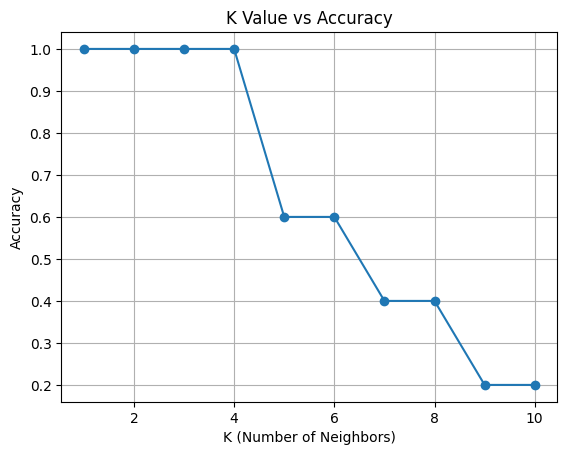

In [4]:
# ============================================
# 3️⃣ Experiment with Different K values
# ============================================
k_values = range(1, 11)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} | Accuracy={acc:.2f}")

# Plot K vs Accuracy
plt.plot(k_values, accuracies, marker='o')
plt.title('K Value vs Accuracy')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# ============================================ 
# # 4️⃣ Best K and Different Distance Metrics 
# # ============================================

# Get only the labels present in y_test
labels_present = np.unique(y_test)

print(f"\n🔹 Metric: {metric}")
print(classification_report(
    y_test,
    y_pred,
    labels=labels_present,
    target_names=le.inverse_transform(labels_present)
))


🔹 Metric: euclidean
              precision    recall  f1-score   support

       Books       1.00      1.00      1.00         1
 Electronics       1.00      1.00      1.00         4

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

